In [1566]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [1567]:
for i in range(45):
    if i==0:
        train = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
    else:
        try:
            temp = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
            train=pd.concat([train,temp])
        except:
            pass

In [1568]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,0.256181,133.77597,1.000,0.685520,0.332179,0.710647,0,0,0.544880,1,CONTRADICTION
1,0.405954,715.74304,2.197,2.104376,1.626334,1.220333,1,2,0.422324,1,CONTRADICTION
2,0.079613,170.33334,1.585,0.682195,0.231839,0.710647,0,0,0.575199,2,ENTAILMENT
3,0.087863,704.00780,2.171,3.503575,2.801286,0.976367,0,0,0.177042,1,CONTRADICTION
4,0.319429,1958.64950,2.581,4.141778,3.274561,2.641717,1,1,0.646140,5,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...
34,0.246888,741.48150,1.685,20.094824,2.440007,0.678063,0,0,0.177094,2,CONTRADICTION
35,0.110792,620.13116,1.530,11.918959,1.058870,0.677722,0,0,0.215289,2,CONTRADICTION
36,0.245541,2406.39450,2.209,27.738925,3.191463,2.083873,1,1,0.554890,3,CONTRADICTION
37,-0.022775,543.06150,2.156,8.155751,1.186878,0.802427,0,0,0.369778,1,CONTRADICTION


In [1569]:
#train["relaciones"]=train["relaciones"]+train["antonimos"]

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

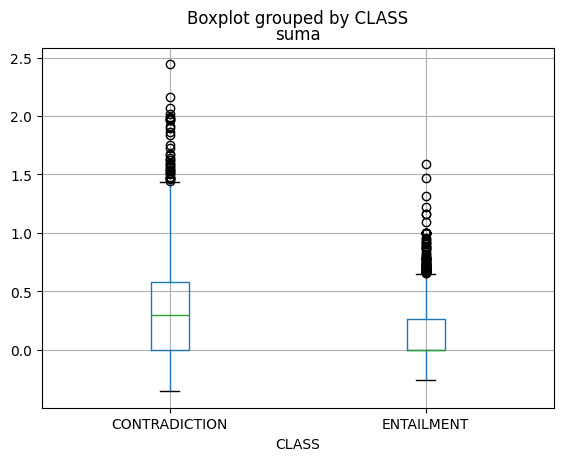

In [1570]:
train.boxplot(by="CLASS",column=["suma"])

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

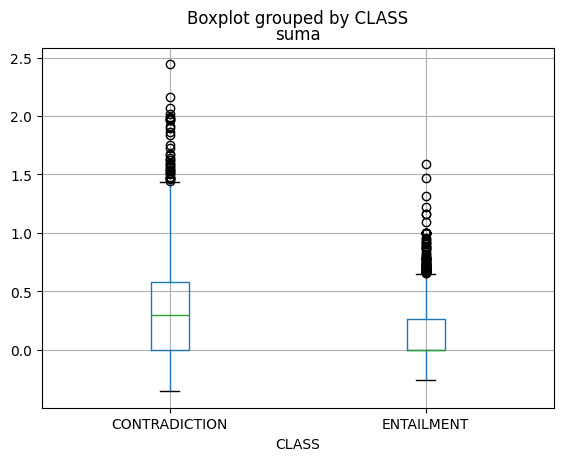

In [1571]:
train.boxplot(by="CLASS",column=["suma"])

In [1572]:
#train=train.drop(["sim_faltantes","distancias","suma","entropias","m_earth"],axis=1)
train=train.drop(["incompatibilidad"],axis=1)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.256181,133.77597,1.000,0.685520,0.332179,0.710647,0,0,0.544880,CONTRADICTION
1,0.405954,715.74304,2.197,2.104376,1.626334,1.220333,1,2,0.422324,CONTRADICTION
2,0.079613,170.33334,1.585,0.682195,0.231839,0.710647,0,0,0.575199,ENTAILMENT
3,0.087863,704.00780,2.171,3.503575,2.801286,0.976367,0,0,0.177042,CONTRADICTION
4,0.319429,1958.64950,2.581,4.141778,3.274561,2.641717,1,1,0.646140,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
34,0.246888,741.48150,1.685,20.094824,2.440007,0.678063,0,0,0.177094,CONTRADICTION
35,0.110792,620.13116,1.530,11.918959,1.058870,0.677722,0,0,0.215289,CONTRADICTION
36,0.245541,2406.39450,2.209,27.738925,3.191463,2.083873,1,1,0.554890,CONTRADICTION
37,-0.022775,543.06150,2.156,8.155751,1.186878,0.802427,0,0,0.369778,CONTRADICTION


In [1573]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [1574]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [1575]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

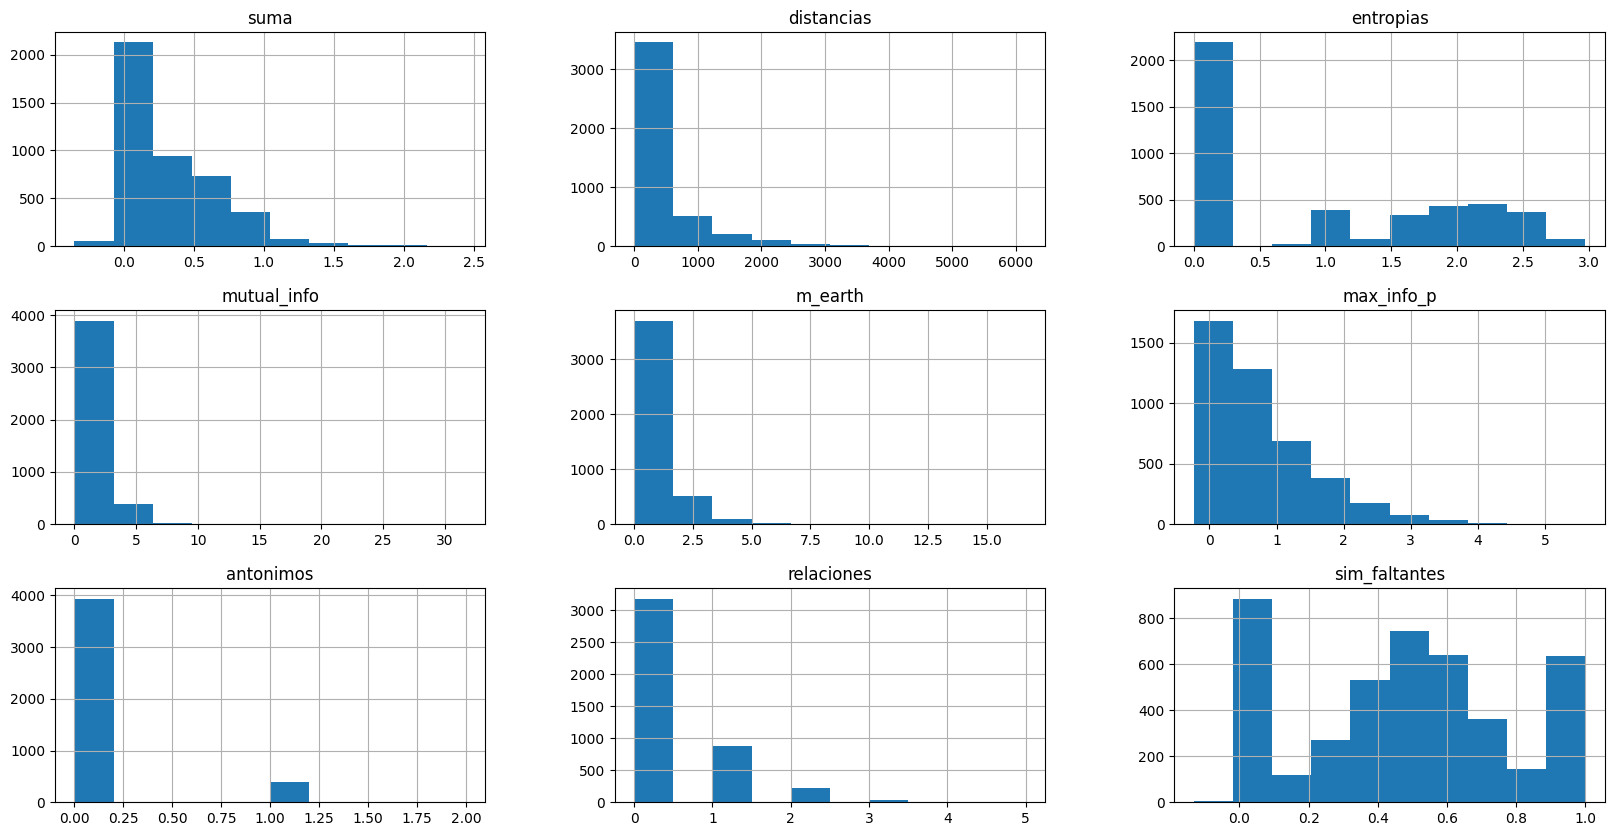

In [1576]:
train.hist(figsize=(20,10))
plt.show()

# DEV

In [1577]:
for i in range(5):
    if i==0:
        dev = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
        dev=pd.concat([dev,temp])

In [1578]:
#dev["relaciones"]=dev["relaciones"]+dev["antonimos"]

In [1579]:
#dev=dev.drop(["sim_faltantes","distancias","suma","entropias","m_earth"],axis=1)
dev=dev.drop(["incompatibilidad"],axis=1)
dev

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.517381,239.79778,0.000,1.368566,0.912076,0.557043,0,0,0.352328,CONTRADICTION
1,0.653972,1350.34460,2.338,3.471361,1.687463,2.614866,0,1,0.660948,CONTRADICTION
2,0.604197,132.28865,1.000,1.420585,0.534727,0.604197,0,0,0.362501,CONTRADICTION
3,1.077954,1020.32196,2.390,3.528014,2.892120,2.360747,0,1,0.611783,CONTRADICTION
4,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
90,0.477556,828.22920,1.784,2.059726,1.580747,1.163645,0,1,0.588903,CONTRADICTION
91,-0.102327,133.99570,1.000,0.670035,0.282470,0.404658,0,0,0.260126,CONTRADICTION
92,0.263025,785.95840,2.459,2.791256,1.364256,0.791051,0,0,0.246701,CONTRADICTION
93,0.095059,1160.19250,2.352,2.763037,2.291368,1.437532,0,1,0.320581,CONTRADICTION


In [1580]:
X_dev = np.array(dev.drop(['CLASS'],axis=1))
y_d = np.array(dev['CLASS'])

In [1581]:
# SICK
y_dev=[]
for i in y_d:
    if i == "ENTAILMENT":
        y_dev.append(1)
    else:
        y_dev.append(0)

In [1582]:
scaler = preprocessing.StandardScaler().fit(X_dev)
X_scaled = scaler.transform(X_dev)
X_dev = X_scaled

# TEST

In [1583]:
for i in range(50):
    if i==0:
        test = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
    else:
        try:
            temp = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
            test=pd.concat([test,temp])
        except:
            pass

In [1584]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [1585]:
#test=test.drop(["sim_faltantes","distancias","suma","entropias","m_earth"],axis=1)
test=test.drop(["incompatibilidad"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.305934,2043.258800,2.514,4.140434,3.473197,2.260727,0,0,0.562271,CONTRADICTION
1,0.182975,942.280940,2.524,2.774364,2.741071,1.473877,0,0,0.487296,CONTRADICTION
2,0.683885,1628.242900,2.453,3.496069,2.353635,2.456701,0,1,0.650113,CONTRADICTION
3,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,ENTAILMENT
4,0.473630,45.112247,0.000,0.669430,0.262647,0.473630,0,0,0.473630,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
1,0.447379,1145.020000,2.671,15.857882,1.478042,1.756696,0,1,0.533970,CONTRADICTION
2,0.050541,1538.683100,2.041,15.745108,3.072888,1.246748,0,1,0.335198,CONTRADICTION
3,-0.155236,766.717400,2.189,15.888051,2.510770,0.930635,0,1,0.156710,CONTRADICTION
4,0.341457,4568.515600,2.383,31.741022,4.585931,3.162525,0,2,0.589734,CONTRADICTION


In [1586]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [1587]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [1588]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [1589]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [1590]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1591]:
model.decision_function(X)

array([ -0.76929894,  -4.16662595,  -0.895108  , ..., -39.97893339,
       -11.40394924, -21.78565135])

In [1592]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes'],
      dtype='object')

In [1593]:
model.classes_

array([0, 1])

In [1594]:
model.coef_[0]

array([-0.15609369, -0.14990799, -0.36150044, -2.82052423, -0.10912606,
        0.6423365 , -0.84076997,  0.56922768, -0.01149293])

In [1595]:
coeficientes=model.coef_[0]

In [1596]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  5 max_info_p 3 mutual_info


In [1597]:
n_columns=train.shape[1]-1

In [1598]:
n_columns

9

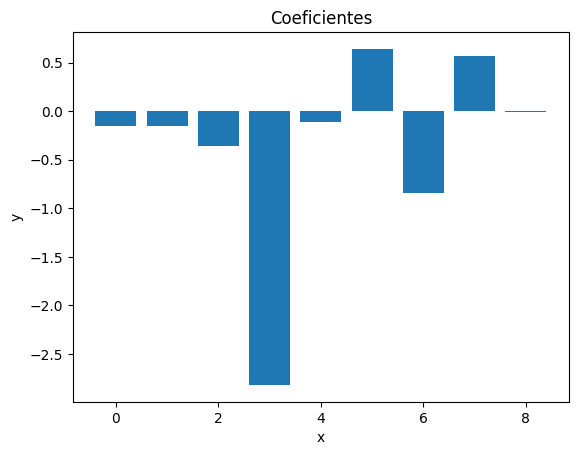

In [1599]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [1600]:
predictions = model.predict(X_dev)

In [1601]:
print(confusion_matrix(y_dev, predictions))

[[273  79]
 [ 46  97]]


In [1602]:
print(confusion_matrix(y_dev, predictions))

[[273  79]
 [ 46  97]]


In [1603]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.75
precision:  0.55
recall 0.68
f1_score:  0.61


In [1604]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.75
precision:  0.55
recall 0.68
f1_score:  0.61


In [1605]:
predictions = model.predict(X_test)

In [1606]:
print(confusion_matrix(y_test, predictions))

[[3446   56]
 [1309   95]]


In [1607]:
print(confusion_matrix(y_test, predictions))

[[3446   56]
 [1309   95]]


In [1608]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.72
precision:  0.63
recall 0.07
f1_score:  0.12
matthews_score:  0.14


In [1609]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.72
precision:  0.63
recall 0.07
f1_score:  0.12
matthews_score:  0.14


In [1610]:
X_train.shape

(4339, 9)

In [1611]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [1612]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [1613]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.550000 (0.043389)


In [1614]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.480000 (0.036461)


In [1615]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.510000 (0.033857)


In [1616]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.330000 (0.044973)


# SHAP

In [1617]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [1618]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [1619]:
train.reset_index(drop=True)

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.256181,133.77597,1.000,0.685520,0.332179,0.710647,0,0,0.544880,CONTRADICTION
1,0.405954,715.74304,2.197,2.104376,1.626334,1.220333,1,2,0.422324,CONTRADICTION
2,0.079613,170.33334,1.585,0.682195,0.231839,0.710647,0,0,0.575199,ENTAILMENT
3,0.087863,704.00780,2.171,3.503575,2.801286,0.976367,0,0,0.177042,CONTRADICTION
4,0.319429,1958.64950,2.581,4.141778,3.274561,2.641717,1,1,0.646140,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
4334,0.246888,741.48150,1.685,20.094824,2.440007,0.678063,0,0,0.177094,CONTRADICTION
4335,0.110792,620.13116,1.530,11.918959,1.058870,0.677722,0,0,0.215289,CONTRADICTION
4336,0.245541,2406.39450,2.209,27.738925,3.191463,2.083873,1,1,0.554890,CONTRADICTION
4337,-0.022775,543.06150,2.156,8.155751,1.186878,0.802427,0,0,0.369778,CONTRADICTION


In [1620]:
X = train.drop(['CLASS'],axis=1)
y_ = train['CLASS']

In [1621]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=1)

In [1622]:
X_train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes
26,0.665316,498.806000,2.059,2.102105,0.912528,1.139852,0,0,0.531749
39,0.169585,279.884950,1.500,1.368799,0.776514,1.129090,1,2,0.625923
89,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000
73,0.870878,26.401731,0.000,0.672853,0.085759,0.870878,1,1,0.870878
74,0.312124,598.815250,2.246,1.382871,0.650819,1.135705,0,2,0.694622
...,...,...,...,...,...,...,...,...,...
95,0.097583,1223.116200,2.594,4.188363,2.584426,2.569629,0,0,0.481006
63,0.614196,662.607670,1.392,2.058371,1.673097,0.857528,0,1,0.446969
5,0.242106,1494.732200,2.421,3.427967,3.032335,2.015485,1,2,0.565135
80,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,0.000000


In [1623]:
y_

0     CONTRADICTION
1     CONTRADICTION
2        ENTAILMENT
3     CONTRADICTION
4     CONTRADICTION
          ...      
34    CONTRADICTION
35    CONTRADICTION
36    CONTRADICTION
37    CONTRADICTION
38    CONTRADICTION
Name: CLASS, Length: 4339, dtype: object

In [1624]:
model = LogisticRegression()
model.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [1625]:
# Make prediction on the testing data
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

CONTRADICTION       0.75      0.87      0.81       816
   ENTAILMENT       0.70      0.52      0.60       486

     accuracy                           0.74      1302
    macro avg       0.73      0.69      0.70      1302
 weighted avg       0.73      0.74      0.73      1302



In [1626]:
model.predict(X)

array(['CONTRADICTION', 'CONTRADICTION', 'CONTRADICTION', ...,
       'CONTRADICTION', 'CONTRADICTION', 'CONTRADICTION'], dtype=object)

In [1627]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer(X_test)

In [1628]:
explainer.model

LogisticRegression()

In [1629]:
explainer.expected_value

-1.7905247694729445

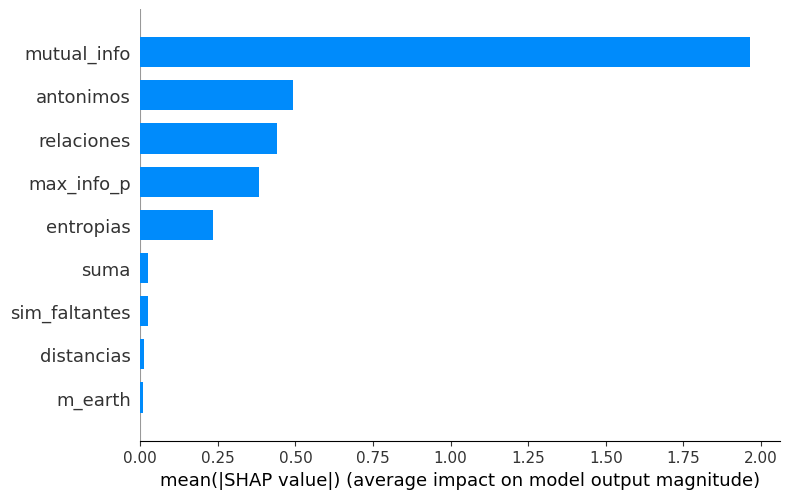

In [1630]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

In [1631]:
shap_values[3]

.values =
array([-0.00481633,  0.00844915, -0.03592298,  1.07565237,  0.00436764,
       -0.03739623,  0.24557038, -0.28247563, -0.00232512])

.base_values =
-1.7905247694729445

.data =
array([ 0.20962968, 93.96001   ,  1.        ,  0.7078531 ,  0.28709191,
        0.6349177 ,  0.        ,  0.        ,  0.47122055])

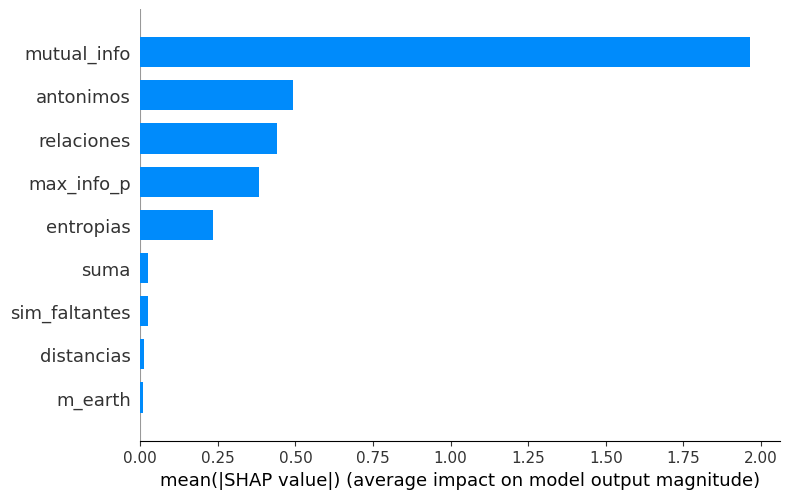

In [1632]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1],plot_type="bar")

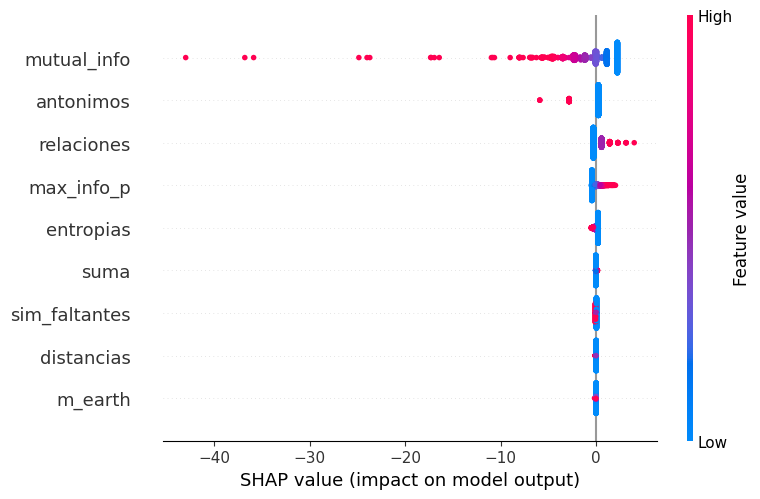

In [1633]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [1634]:
shap_values

.values =
array([[-2.25085908e-02, -7.58446215e-02, -3.87397814e-01, ...,
         2.45570384e-01, -2.82475634e-01,  3.22629694e-03],
       [ 1.68609936e-02,  9.34814818e-03,  2.14237045e-01, ...,
         2.45570384e-01, -2.82475634e-01, -7.16335633e-04],
       [ 9.34014912e-03, -1.12361254e-02, -3.90649895e-01, ...,
         2.45570384e-01,  5.73511136e-01,  1.20273338e-04],
       ...,
       [ 5.47481451e-02, -2.43344208e-02, -4.11663337e-01, ...,
         2.45570384e-01,  5.73511136e-01, -1.25398381e-02],
       [ 5.58696144e-02,  8.53005746e-03, -3.59229796e-02, ...,
         2.45570384e-01, -2.82475634e-01, -1.14037105e-02],
       [-2.34729363e-02,  1.08616590e-02,  2.14237045e-01, ...,
         2.45570384e-01, -2.82475634e-01,  3.97447570e-02]])

.base_values =
array([-1.79052477, -1.79052477, -1.79052477, ..., -1.79052477,
       -1.79052477, -1.79052477])

.data =
array([[1.08355940e-02, 3.37695340e+03, 2.40500000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.0903968

In [1635]:
#pd.DataFrame(shap_values).describe()